# <center><h1><font color="blue">Ghouls, Goblins, and Ghosts</font></h1></center>

<center><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5708/media/halloween-660x.png" height=200 /></center>

<h1> Abstract</h1>

**Ghouls, Goblins, and Ghosts** is a learning level project competition 
found in Kaggle. <br>
From  given train dataset Ghouls_train.csv Classification models are developed and tuned the models to predict the type of monster based on its features as Ghouls, Goblins and Ghosts. 
<br>
Upon building robust classification model from train dataset, I have predicted type of monster for given test datset Ghouls_test.csv and submitted the prediction.

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br/>
3. [Exploratory data analysis](#section3)
4. [Model Creation](#section4)<br/>
    - 4.1 [Classifier Comparision]<br/>
    - 4.2 [LogisticRegression]<br/>
    - 4.3 [AdaBoostClassifer]<br/>
    - 4.4 [XGBClassifier](<br/>
    - 4.5 [DecisionTree Classifier]<br/>
    - 4.6 [Random Forest Classifier]<br/>
    - 4.7 [Bagging Classifier]<br/>
    - 4.8 [Voting Classifier]<br/>
5. [Submit test predictions](#section5)<br/>

<a id="section1"></a>
### 1. Problem Statement

In this competition we need to __analyse__ given datset to __classify__ type of the monster based on  its feature __color__, __bone length__, __percentage of soul__, __flesh type__ and __hair length__. <br> 
Develop __machine learning classification model__ to predict the __monster__ with high accuracy and apply it to test dataset Ghouls_test.csv and submit the  prediction. In this challenge I am classifying monster based on model built using train dataset. 


<a id="section2"></a>
### 2. Data Loading and Description

In [0]:
# importing libraires
%matplotlib inline                 

import pandas as pd                # Implemennts milti-dimensional array and matrices
import numpy as np                 # For data manipulation and analysis
import matplotlib.pyplot as plt    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns              # Provides a high level interface for drawing attractive and informative statistical graphics
import io                                     # To import datasets.


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
label=LabelEncoder()


####Load Datasets

In [0]:
#from sklearn.preprocessing import Imputer

train_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_test.csv")


Understand the train and test dataset

In [4]:
print("Train Dataset info --")
train_df.info()
print("\n\nTest Dataset info --")
test_df.info()

Train Dataset info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


Test Dataset info --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


<a id="section3"></a>
### 3.Exploratory data analysis
![](https://s.yimg.com/ny/api/res/1.2/h0cqtHim0GQS9_CbE6lEQw--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/https://media.zenfs.com/en-us/the_quint_389/a074b475d68382fdd721afa1d80fd293)

**Exploratory data analysis (EDA)** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [5]:
train_df.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


From above info it is clear that dataset is not having missing info and column id is not making any sense to us. Lets plot correlation to see if we can drop any columns which is not relevant

In [0]:
color_le = preprocessing.LabelEncoder()
color_le.fit(train_df['color'])
train_df['color_int'] = color_le.transform(train_df['color'])

Text(0.5, 1, 'Correlations Among Features')

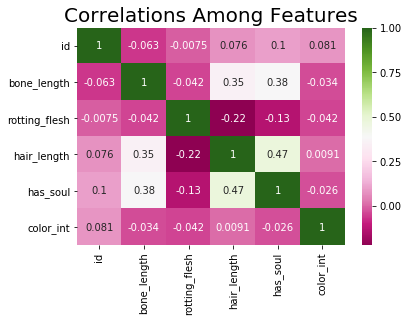

In [7]:
sns.heatmap(train_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20)

From the corr() plot above we can drop __color__ and __id__ feature from both train and test datasets as they are not significant for predicting monster

In [0]:
train_df = train_df.drop(['id'], axis = 1)
test_df = test_df.drop(['id'], axis = 1)

train_df = train_df.drop(['color_int'], axis = 1)
train_df = train_df.drop(['color'], axis = 1)
test_df = test_df.drop(['color'], axis = 1)

Now lets confirm if we have __unique monters__ and there is __no spell mistake__ which affects our prediction model otherwise.

In [9]:
print(np.sort(train_df['type'].unique()))

['Ghost' 'Ghoul' 'Goblin']


This Confirms we have unique values in our target variable __type__

<a id="section4"></a>
### 4. Model Creation

 I will train the data with the following models:
- Logistic Regression
- Gaussian Naive Bayes
- Support Vector Machines
- Decision Tree Classifier
- Random Forest Classifier
- K-Nearest Neighbors(KNN)
- AdaBoost Classifier
- LDA Classifier
- Gradient Boosting Classifier
- XGB Classifier
 


In [0]:
X = train_df.drop('type', 1)
y = train_df['type']


#### Classifier Comparision

By Classifier Comparison we choose which model best for the given data.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

classifiers = [
    LogisticRegression(),
    GaussianNB(),
    svm.SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(3),
    AdaBoostClassifier(),
    LinearDiscriminantAnalysis(),
    GradientBoostingClassifier(),
    XGBClassifier()
    ]
    
log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

SSplit=StratifiedShuffleSplit(test_size=0.2,random_state=8)
acc_dict = {}

for train_index,test_index in SSplit.split(X,y):
  X_train,X_test=X.iloc[train_index],X.iloc[test_index]
  y_train,y_test=y.iloc[train_index],y.iloc[test_index]

  for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train,y_train)
    predict=clf.predict(X_test)
    acc=accuracy_score(y_test,predict)
    if name in acc_dict:
      acc_dict[name]+=acc
    else:
      acc_dict[name]=acc


Text(0.5, 1.0, 'Classifier Accuracy')

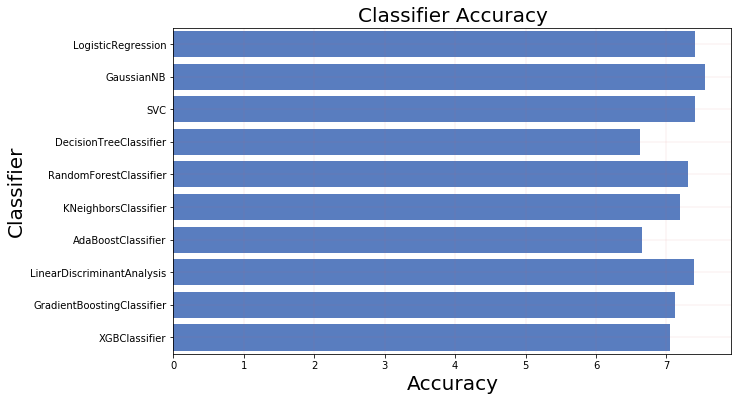

In [13]:

log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2,3,4,5,6,7,8,9]])
%matplotlib inline
sns.set_color_codes("muted")
ax=plt.subplots(figsize=(10,6))
ax=sns.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=20)
plt.ylabel('Classifier',fontsize=20)
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.title('Classifier Accuracy',fontsize=20)


From the above barplot, we can clearly see that the following classifiers are good, considering > 70% accuracy- And we are using below algorithms from where resultrs are derived from train dataset to predict monster in givin test dataset

- Logistic Regression
- Support Vector Machine
- GaussianNB
- Random Forest Classifier
- K Nearest Neighbour (KNN)
- Linear Discriminant Analysis
- GradientBoostingClassifier 
- XGB Classifier

__Time to train every model with further hyperparameter tuning extension__

In [0]:
## Necessary modules for creating models. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

**Scaling features**

In [16]:

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
testframe = std_scaler.fit_transform(test_df)
testframe.shape


(529, 4)

**GridSearch**

Using the GridSearch ,Lets find out the most suitable parameter/hyperparmeter which gives the best result.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1000)


#### LogisticRegression

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score,recall_score,confusion_matrix
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train,y_train)
predict=logreg.predict(X_test)
print(accuracy_score(y_test,predict))
print(confusion_matrix(y_test,predict))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,predict))
print("f1_score" , f1_score(y_test,predict, average='weighted'))

0.7466666666666667
[[22  0  5]
 [ 0 18  5]
 [ 5  4 16]]
jaccard_similarity_score 0.7466666666666667
f1_score 0.7478169934640524


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**Grid Search on Logistic Regression**

In [0]:
C_vals = [0.0001, 0.001, 0.01, 0.1,0.13,0.2, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 4.0,4.5,5.0,5.1,5.5,6.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

param = {'penalty': penalties, 'C': C_vals, }
grid = GridSearchCV(logreg, param,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=10,shuffle=True), n_jobs=1,scoring='accuracy')

In [21]:
grid.fit(X_train,y_train)
print (grid.best_params_)
print (grid.best_score_)
print(grid.best_estimator_)

{'C': 4.0, 'penalty': 'l1'}
0.7603389830508475
LogisticRegression(C=4.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [22]:
logreg_grid = LogisticRegression(penalty='l2')
logreg_grid.fit(X_train,y_train)
y_pred = logreg_grid.predict(X_test)
logreg_accy = round(accuracy_score(y_test, y_pred), 3)
print (logreg_accy)
print(confusion_matrix(y_test,y_pred))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,y_pred))
print("f1_score" , f1_score(y_test,y_pred, average='weighted'))

0.76
[[21  0  6]
 [ 0 19  4]
 [ 3  5 17]]
jaccard_similarity_score 0.76
f1_score 0.7623625685953597


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### Gausian NB

In [23]:
gausianNB = GaussianNB()
gausianNB.fit(X_train,y_train)
predict = gausianNB.predict(X_test)

gausian_acccy = accuracy_score(y_test, y_pred)
print (gausian_acccy)
print(confusion_matrix(y_test,y_pred))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,predict))
print("f1_score" , f1_score(y_test,predict, average='weighted'))

0.76
[[21  0  6]
 [ 0 19  4]
 [ 3  5 17]]
jaccard_similarity_score 0.7733333333333333
f1_score 0.7763638122883406


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)




####  Support Vector Machine

In [24]:
from sklearn.svm import SVC

# Implement SVM with various kernels and measure the accuracy score for each
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
SVM_acc_score = np.zeros((len(kernel)))
for i,k in enumerate(kernel):
    clssfr = SVC(gamma='auto',kernel=k)
    clssfr.fit(X_train, y_train)
    y_SVM_pred = clssfr.predict(X_test)
    SVM_acc_score[i] = accuracy_score(y_test, y_SVM_pred)

# Print the accuracy score of each SVM model
print("SVM's Accuracy: ")
for i,k in enumerate(kernel):
    print("kernel = {} -> acc = {}".format(k,SVM_acc_score[i]))

# Obtain the best performing kernel based on accuracy score on the test set and retrieve the corresponding SVM model
i_opt = np.argmax(SVM_acc_score)
svm_opt = SVC(gamma='auto',kernel=kernel[i_opt])
svm_opt.fit(X_train, y_train)
y_SVM_opt_pred = svm_opt.predict(X_test)
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,y_SVM_opt_pred))
print("f1_score" , f1_score(y_test,y_SVM_opt_pred, average='weighted'))

SVM's Accuracy: 
kernel = linear -> acc = 0.7333333333333333
kernel = poly -> acc = 0.6666666666666666
kernel = rbf -> acc = 0.76
kernel = sigmoid -> acc = 0.72
jaccard_similarity_score 0.76
f1_score 0.7639005439005438


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### K Nearest Neighbour

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Implement kNN models for various k and measure the accuracy score for each
kNN_acc_score = np.zeros((10))
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_kNN_pred = knn.predict(X_test)
    kNN_acc_score[k-1] = accuracy_score(y_test, y_kNN_pred)

# Print the accuracy score of each kNN model
print("kNN's Accuracy: ")
for k in range(len(kNN_acc_score)):
    print("k = {0:2d} -> acc = {1:5.2f}%".format(k+1,100.*kNN_acc_score[k]))

# Obtain the optimal k based on accuracy score on the test set and retrieve the corresponding kNN model
k_opt = np.argmax(kNN_acc_score) + 1
knn_opt = KNeighborsClassifier(n_neighbors = k_opt).fit(X_train,y_train)
y_kNN_opt_pred = knn_opt.predict(X_test)

print(accuracy_score(y_test,y_kNN_opt_pred))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,y_kNN_opt_pred))
print("f1_score" , f1_score(y_test,y_kNN_opt_pred, average='weighted'))

kNN's Accuracy: 
k =  1 -> acc = 65.33%
k =  2 -> acc = 70.67%
k =  3 -> acc = 65.33%
k =  4 -> acc = 70.67%
k =  5 -> acc = 70.67%
k =  6 -> acc = 73.33%
k =  7 -> acc = 74.67%
k =  8 -> acc = 70.67%
k =  9 -> acc = 73.33%
k = 10 -> acc = 74.67%
0.7466666666666667
jaccard_similarity_score 0.7466666666666667
f1_score 0.7507005363609138


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### AdaBoostClassifer

In [26]:
ABC=AdaBoostClassifier()

ABC.fit(X_train,y_train)
predict=ABC.predict(X_test)
print(accuracy_score(y_test,predict))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,predict))
print("f1_score" , f1_score(y_test,predict, average='weighted'))


0.68
jaccard_similarity_score 0.68
f1_score 0.6793833057257577


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**GridSearch on AdaBoostClassifer**

In [0]:
from sklearn.tree import DecisionTreeClassifier
n_estimator=[50,60,100,150,200,300]
learning_rate=[0.001,0.01,0.1,0.2,]
hyperparam={'n_estimators':n_estimator,'learning_rate':learning_rate}
gridBoost=GridSearchCV(ABC,param_grid=hyperparam,verbose=False, cv = StratifiedKFold(n_splits=5,random_state=15,shuffle=True), n_jobs=1,scoring='accuracy')

In [28]:
gridBoost.fit(X_train,y_train)
print(gridBoost.best_score_)
print(gridBoost.best_estimator_)

0.6788135593220339
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=200, random_state=None)


In [29]:
gridBoost.best_estimator_.fit(X_train,y_train)
predict=gridBoost.best_estimator_.predict(X_test)
print(accuracy_score(y_test,predict))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,predict))
print("f1_score" , f1_score(y_test,predict, average='weighted'))


0.7066666666666667
jaccard_similarity_score 0.7066666666666667
f1_score 0.7081962093013306


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### XGBClassifier

In [30]:
xgb=XGBClassifier(max_depth=2, n_estimators=700, learning_rate=0.009,nthread=-1,subsample=1,colsample_bytree=0.8)
xgb.fit(X_train,y_train)
predict=xgb.predict(X_test)
print(accuracy_score(y_test,predict))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,predict))
print("f1_score" , f1_score(y_test,predict, average='weighted'))

0.72
jaccard_similarity_score 0.72
f1_score 0.7240305892937472


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=20,max_features=0.2, min_samples_leaf=8,random_state=20)
#randomforest = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
random_accy = round(accuracy_score(y_pred, y_test), 3)
print (random_accy)
print(confusion_matrix(y_test,y_pred))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,y_pred))
print("f1_score" , f1_score(y_test,y_pred, average='weighted'))


0.747
[[22  0  5]
 [ 0 19  4]
 [ 4  6 15]]
jaccard_similarity_score 0.7466666666666667
f1_score 0.7457273349591408


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### Linear Descriminant Analysis (LDA)

In [33]:
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
predict=lda.predict(X_test)
print(accuracy_score(y_test,predict))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,predict))
print("f1_score" , f1_score(y_test,predict, average='weighted'))

0.76
jaccard_similarity_score 0.76
f1_score 0.7623625685953597


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### DecisionTree Classifier

In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier( criterion="entropy",
                                 max_depth=5,
                                class_weight = 'balanced',
                                min_weight_fraction_leaf = 0.009,
                                random_state=2000)
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)
dectree_accy = round(accuracy_score(y_pred, y_test), 3)
print(dectree_accy)
print(confusion_matrix(y_test,y_pred))
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,y_pred))
print("f1_score" , f1_score(y_test,y_pred, average='weighted'))


0.613
[[19  0  8]
 [ 0 18  5]
 [ 6 10  9]]
jaccard_similarity_score 0.6133333333333333
f1_score 0.6072070857803024


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### Bagging Classifier


In [38]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier = BaggingClassifier()
BaggingClassifier.fit(X_train, y_train)
y_pred = BaggingClassifier.predict(X_test)
bagging_accy = round(accuracy_score(y_pred, y_test), 3)
print(bagging_accy)
print("jaccard_similarity_score" , jaccard_similarity_score(y_test,y_pred))
print("f1_score" , f1_score(y_test,y_pred, average='weighted'))


0.707
jaccard_similarity_score 0.7066666666666667
f1_score 0.706074074074074


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)



#### Voting Classifier

Now lets increate the accuracy on above derived models and by using voting classifier we are increasing accuracy.

In [42]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
      ('logreg',logreg), 
      ('gausianNB',gausianNB), 
     ('SVM',svm_opt), 
    ('randomforest', randomforest),
    ('knn_opt', knn_opt),
    ('LDA', lda), 
    ('randomForest', randomForest), 
    ('XGB Classifier', xgb)])

voting_classifier.fit(X_train,y_train)
y_pred = voting_classifier.predict(X_test)
voting_accy = round(accuracy_score(y_pred, y_test), 3)
print(voting_accy)

0.747


<a id="section5"></a>
### 5. Submit test predictions


In [45]:
temp = pd.DataFrame(pd.DataFrame({
        "Id": id,
        "type": y_pred
    }))
print(temp)


                        Id    type
0   <built-in function id>  Goblin
1   <built-in function id>   Ghost
2   <built-in function id>   Ghost
3   <built-in function id>   Ghoul
4   <built-in function id>   Ghoul
..                     ...     ...
70  <built-in function id>  Goblin
71  <built-in function id>  Goblin
72  <built-in function id>  Goblin
73  <built-in function id>   Ghost
74  <built-in function id>   Ghost

[75 rows x 2 columns]
